In [39]:
%matplotlib inline

In [217]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [231]:
# Load in csv
df = pd.read_csv("Titanic data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [233]:
# Make a raw data file
df_raw = df.copy()

In [235]:
# Set PassengerId as index
df = df.set_index("PassengerId",drop=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
# Renaming columns
df = df.rename(columns={"PassengerId": "Passenger ID", 
                        "Pclass": "Ticket Class",
                        "Age":"Age in Years",
                        "SibSp":"# of Siblings/Spouses on Board",
                        "Parch":"# of Children/Parents on Board",
                        "Ticket":"Ticket Number",
                        "Embarked":"Port of Embarkation"})
df.head()

,Survived,Ticket Class,Name,Sex,Age in Years,# of Siblings/Spouses on Board,# of Children/Parents on Board,Ticket Number,Fare,Cabin,Port of Embarkation
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
df.count()

Survived                          1309
Ticket Class                      1309
Name                              1309
Sex                               1309
Age in Years                      1046
# of Siblings/Spouses on Board    1309
# of Children/Parents on Board    1309
Ticket Number                     1309
Fare                              1308
Cabin                              295
Port of Embarkation               1307
dtype: int64

In [241]:
# Remove 'Cabin' column, not enough information
df = df.drop("Cabin",axis=1)
df.head()

,Survived,Ticket Class,Name,Sex,Age in Years,# of Siblings/Spouses on Board,# of Children/Parents on Board,Ticket Number,Fare,Port of Embarkation
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
# Remove rows with any missing data
df = df.dropna()
df.count()

Survived                          1043
Ticket Class                      1043
Name                              1043
Sex                               1043
Age in Years                      1043
# of Siblings/Spouses on Board    1043
# of Children/Parents on Board    1043
Ticket Number                     1043
Fare                              1043
Port of Embarkation               1043
dtype: int64

In [88]:
# New dataframe of only those who survived and their information
survived_df = df[df["Survived"]==1][["Survived","Ticket Class","Sex","Age in Years","Fare","Port of Embarkation"]]
survived_df.head(2)

,Survived,Ticket Class,Sex,Age in Years,Fare,Port of Embarkation
PassengerId,,,,,,
2,1,1,female,38.0,71.2833,C
3,1,3,female,26.0,7.9250,S


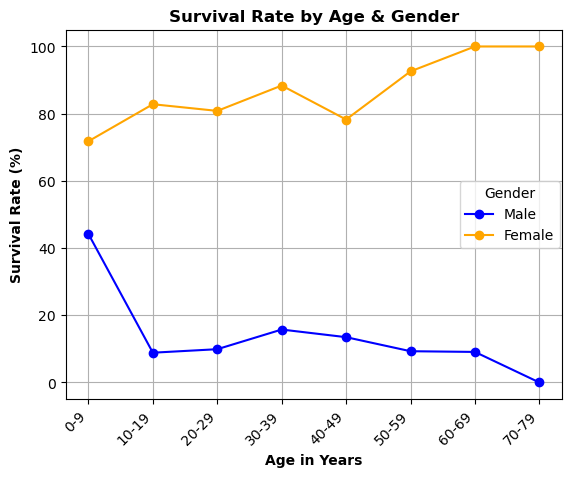

In [273]:
# Data Visual 1 - Survival Rate Based on Age & Gender

# Explore average survival rate based on age

import pandas as pd
import matplotlib.pyplot as plt

# Converts age values to numeric 
df_raw['Age'] = pd.to_numeric(df_raw['Age'])

# Remove rows where age is missing
df_raw = df_raw.dropna(subset=['Age'])

# Age bins
bins = range(0, 90, 10)  # Adjust the range if needed (0 to 90 with 10-year intervals)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df_raw['Age_Bins'] = pd.cut(df_raw['Age'], bins=bins, labels=labels, right=False, ordered=True)

# Calculate survival rate by age and gender
survival_rate_gender = df_raw.groupby(['Age_Bins', 'Sex'])['Survived'].mean().reset_index()

# Pivot the data for easier plotting
survival_rate_pivot = survival_rate_gender.pivot(index='Age_Bins', columns='Sex', values='Survived') * 100
survival_rate_pivot.index = pd.Categorical(survival_rate_pivot.index, categories=labels, ordered=True)

# Line plot
plt.plot(survival_rate_pivot.index, survival_rate_pivot.get('male', []), marker='o', linestyle='-', color='blue', label='Male')
plt.plot(survival_rate_pivot.index, survival_rate_pivot.get('female', []), marker='o', linestyle='-', color='orange', label='Female')

# Titles and labels
plt.title("Survival Rate by Age & Gender", fontweight='bold')
plt.xlabel("Age in Years", fontweight='bold')
plt.ylabel("Survival Rate (%)", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend(title='Gender', loc='center right', bbox_to_anchor=(1.01, 0.5))

plt.show()

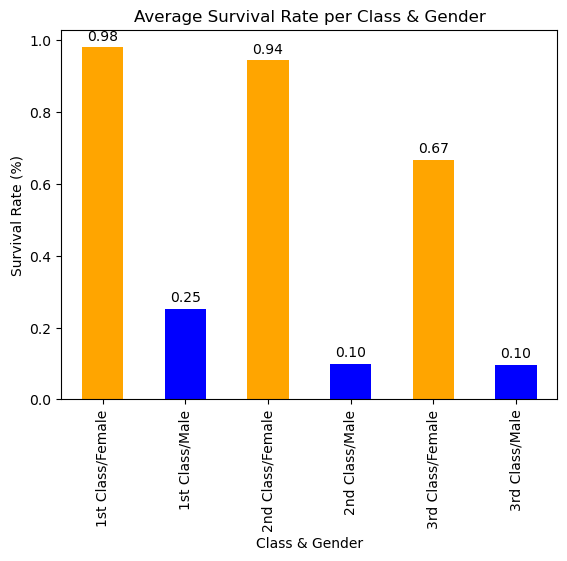

In [279]:
# Data Visual 2 - Survival Rate Based on Ticket Class & Gender

# Explore average survival rate based on ticket class and gender 

df_groupby_total = df_raw.groupby(["Pclass","Sex"], as_index=True)['Survived'].mean()
df_groupby_total.plot.bar(color=['orange','blue','orange','blue','orange','blue'], rot=0)
plt.title("Average Survival Rate per Class & Gender")
plt.xlabel("Class & Gender")
new_labels = ["1st Class/Female",
              "1st Class/Male",
              "2nd Class/Female",
              "2nd Class/Male",
              "3rd Class/Female",
              "3rd Class/Male"]
plt.xticks(ticks=range(len(df_groupby_total)), labels=new_labels, rotation=90)
plt.ylabel("Survival Rate (%)")
for i, value in enumerate(df_groupby_total):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center')

plt.show()

Accuracy: 0.8466453674121406
Confusion Matrix:
[[165  25]
 [ 23 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       190
           1       0.80      0.81      0.81       123

    accuracy                           0.85       313
   macro avg       0.84      0.84      0.84       313
weighted avg       0.85      0.85      0.85       313



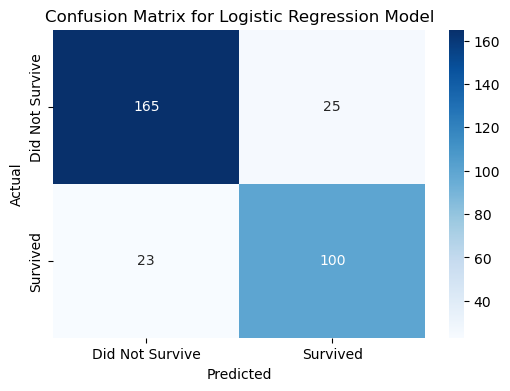

In [1]:
# Data Visual 3 - Logistic Regression Model of Survival Rate

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the dataset
df = pd.read_csv("Titanic data.csv")
df = df.rename(columns={"Pclass": "Ticket Class", "Age": "Age in Years",
                        "SibSp": "# of Siblings/Spouses on Board", "Parch": "# of Children/Parents on Board",
                        "Ticket": "Ticket Number", "Embarked": "Port of Embarkation"})

# Drop columns and missing values
df = df.drop("Cabin", axis=1)  # Drop the 'Cabin' column
df = df.dropna()  # Drop rows with missing data

# Keep relevant columns for regression
df = df[['Survived', 'Ticket Class', 'Sex', 'Age in Years', 'Fare', 'Port of Embarkation']]

# Convert 'Sex' and 'Port of Embarkation' into numeric
df = pd.get_dummies(df, columns=['Sex', 'Port of Embarkation'], drop_first=True)

# Step 1: Train-Test Split
X = df.drop(columns=['Survived']) 
y = df['Survived']  # Target (Survived: 0 or 1)

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = logreg.predict(X_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [ ]:
# END